In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. EDA

## Initial Data Exploration

In [ ]:
#loading the data
file_id = "1jEMY_QcNmnqMbc8-TRsGTYWI0nf6jygl"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

In [ ]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           999 non-null    object
 1   Valuation ($B)    999 non-null    object
 2   Date Joined       999 non-null    object
 3   Country           999 non-null    object
 4   City              983 non-null    object
 5   Industry          999 non-null    object
 6   Select Investors  998 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Company,0
Valuation ($B),0
Date Joined,0
Country,0
City,16
Industry,0
Select Investors,1


In [ ]:
# Summary statistics for numerical columns
df.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
count,999,999,999,999,983,999,998
unique,998,200,612,46,249,17,983
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,Sequoia Capital
freq,2,239,8,510,140,204,3


In [ ]:
# Summary statistics for categorical columns
df.describe(include=['object'])

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
count,999,999,999,999,983,999,998
unique,998,200,612,46,249,17,983
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,Sequoia Capital
freq,2,239,8,510,140,204,3


**Initial Insights from the Dataset**

1. **Structure of the Data**


*   The dataset contains 999 rows and 7 columns.

*   All columns are of type object (string), including numerical values like "Valuation ($B)" and "Date Joined", which will need conversion.




2. **Columns Overview**

*   Company: Contains unique company names (998 unique, one duplicate).

*   Valuation	: The valuation amounts are stored as strings with a $ sign, so they need conversion to numeric.

*   Date Joined: Stored as a string, should be converted to a date format for proper analysis.


*  Country & City: The City column has some missing values (983 non-null).
Industry: Contains 17 unique industries.

*   Select Investors: Mostly unique values; has one missing value.

3. Numerical and Categorical Summary

The dataset contains 999 companies with valuations ranging from 1B to 140B, with an average of 3.31B and a median of 1.6B. The United States dominates with 510 companies, followed by China, India, and the UK, while San Francisco is the top city with 140 unicorns. The fintech industry leads with 204 companies among 17 industries. There are 983 unique investor sets, with Sequoia Capital appearing most frequently.











## Data preproccesing

In [ ]:
# Clean the "Valuation ($B)" column by removing the "$" sign and converting to numeric
df['Valuation ($B)'] = df['Valuation ($B)'].replace('[\$,]', '', regex=True).astype(float)

# Convert "Date Joined" to datetime format
df['Date Joined'] = pd.to_datetime(df['Date Joined'], format='%m/%d/%Y', errors='coerce')

In [ ]:
# finding null value cases
df[df.isnull().any(axis=1)]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
10,FTX,32.0,2021-07-20,Hong Kong,NaN,Fintech,"Sequoia Capital, Thoma Bravo, Softbank"
207,HyalRoute,3.5,2020-05-26,Singapore,NaN,Mobile & telecommunications,Kuang-Chi
310,Moglix,2.6,2021-05-17,Singapore,NaN,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway"
425,Advance Intelligence Group,2.0,2021-09-23,Singapore,NaN,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund"
613,Trax,1.3,2019-07-22,Singapore,NaN,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T..."
723,Amber Group,1.1,2021-06-21,Hong Kong,NaN,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve..."
728,Carousell,1.1,2021-09-15,Singapore,NaN,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent..."
759,LinkSure Network,1.0,2015-01-01,China,Shanghai,Mobile & telecommunications,NaN
784,WeLab,1.0,2017-11-08,Hong Kong,NaN,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene..."
854,PatSnap,1.0,2021-03-16,Singapore,NaN,Internet software & services,"Sequoia Capital China, Shunwei Capital Partner..."


After analyzing the missing values, I decided to fill the missing City values based on the Country column, as the missing cases occurred in two specific scenarios:


*   Country = Singapore
*   Country = Hong Kong

It is correct to fill these companies cities as "Singapore" and "Hong Kong" respectively because:

Singapore is both a city and a country, so "Singapore" as the city is accurate.
Hong Kong is officially a city, but in business and financial datasets, it is often listed as a separate country-like entity due to its independent economic system, currency, and regulations.

Additionally, the missing value in the Select Investors column was for LenkSure Company.Based on data of this [website](https://pitchbook.com/profiles/company/114429-16#patents) I filled in the missing information accordingly.

In [ ]:
# Manually filling missing City values
city_mapping = {
    "FTX": "Hong Kong",
    "HyalRoute": "Singapore",
    "Moglix": "Singapore",
    "Advance Intelligence Group": "Singapore",
    "Trax": "Singapore",
    "Amber Group": "Hong Kong",
    "Carousell": "Singapore",
    "WeLab": "Hong Kong",
    "PatSnap": "Singapore",
    "Matrixport": "Singapore",
    "Carro": "Singapore",
    "bolttech": "Singapore",
    "NIUM": "Singapore",
    "Cider": "Hong Kong",
    "Ninja Van": "Singapore",
    "ONE": "Singapore",
}

# Update the missing city values
df.loc[df['Company'].isin(city_mapping.keys()), 'City'] = df['Company'].map(city_mapping)

# Update the  missing "Select Investors" value
investors = "Bank of China Group Investment, Eight Roads, Orchid Asia Group Management, Primavera Capital Group, Cheetah Mobile"
df.loc[df["Company"] == "LinkSure Network", "Select Investors"] = investors


# Verify if there are still missing values in the City column
df['City'].isnull().sum()


np.int64(0)

In [ ]:
# Check for duplicate companies
df[df.duplicated(subset=['Company'], keep=False)]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
37,Bolt,11.0,2021-10-08,United States,San Francisco,Fintech,"Activant Capital, Tribe Capital, General Atlantic"
62,Bolt,8.4,2018-05-29,Estonia,Tallinn,Auto & transportation,"Didi Chuxing, Diamler, TMT Investments"


Here we have 2 different companies with the same name to easily differntiate them i added their country name to the company name

In [ ]:
# Update company names by appending the country name for differentiation
df.loc[(df['Company'] == 'Bolt') & (df['Country'] == 'United States'), 'Company'] = 'Bolt (USA)'
df.loc[(df['Company'] == 'Bolt') & (df['Country'] == 'Estonia'), 'Company'] = 'Bolt (Estonia)'

# Verify the update
df[df['Company'].str.contains('Bolt', case=False, na=False)]


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
37,Bolt (USA),11.0,2021-10-08,United States,San Francisco,Fintech,"Activant Capital, Tribe Capital, General Atlantic"
62,Bolt (Estonia),8.4,2018-05-29,Estonia,Tallinn,Auto & transportation,"Didi Chuxing, Diamler, TMT Investments"
576,Firebolt,1.4,2022-01-26,Israel,Tel Aviv,Data management & analytics,"TLV Partners, Zeev Ventures, Bessemer Venture ..."
900,bolttech,1.0,2021-07-01,Singapore,Singapore,Fintech,"Mundi Ventures, Doqling Capital Partners, Acti..."


In [ ]:
# Adding Armenians unicorns
armenian_unicorns = pd.DataFrame([
    {
        "Company": "Picsart",
        "Valuation ($B)": 1.5,
        "Date Joined": pd.to_datetime("2021-08-26"),
        "Country": "Armenia",
        "City": "Yerevan",
        "Industry": "Technology",
        "Select Investors": "London Technology Club, Agnostic Ventures, G Squared, Venture, SoftBank Investment Advisers, Tribe Capital"
    },
    {
        "Company": "ServiceTitan",
        "Valuation ($B)": 8.97,
        "Date Joined": pd.to_datetime("2018-03-23"),
        "Country": "United States",
        "City": "Glendale",
        "Industry": "Software",
        "Select Investors": "Index Ventures, Battery Ventures, Bessemer Venture Partners, Sequoia Capital"
    }
])

df = pd.concat([df, armenian_unicorns], ignore_index=True)
df.tail(5)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
996,Esusu,1.00,2022-01-27,United States,New York,Fintech,"Next Play Ventures, Zeal Capital Partners, Sof..."
997,Betterfly,1.00,2022-02-01,Chile,Santiago,Artificial intelligence,"QED Investors, DST Global, Endeavor"
998,Dune Analytics,1.00,2022-02-02,Norway,Oslo,Data management & analytics,"Multicoin Capital, Coatue Management, Dragonfl..."
999,Picsart,1.50,2021-08-26,Armenia,Yerevan,Technology,"London Technology Club, Agnostic Ventures, G S..."
1000,ServiceTitan,8.97,2018-03-23,United States,Glendale,Software,"Index Ventures, Battery Ventures, Bessemer Ven..."


In [ ]:
display(df.describe())


,Valuation ($B),Date Joined
count,1001.000000,1001
mean,3.312078,2020-03-28 02:03:42.977022976
min,1.000000,2007-07-20 00:00:00
25%,1.070000,2019-03-19 00:00:00
50%,1.600000,2021-03-01 00:00:00
75%,3.100000,2021-08-10 00:00:00
max,140.000000,2022-02-02 00:00:00
std,7.403775,NaN


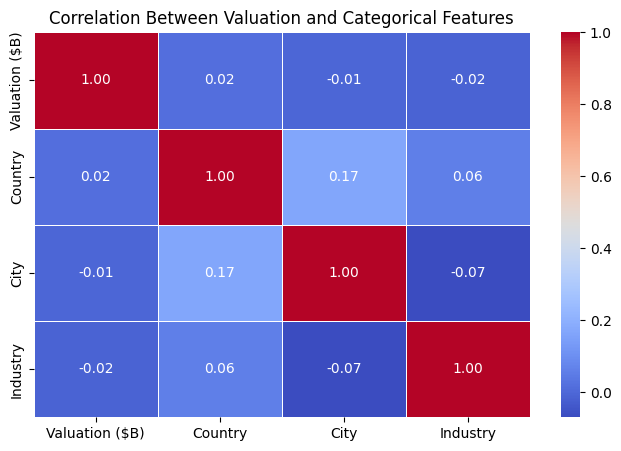

,Valuation ($B),Country,City,Industry
Valuation ($B),1.000000,0.015795,-0.006289,-0.015392
Country,0.015795,1.000000,0.166127,0.056241
City,-0.006289,0.166127,1.000000,-0.070006
Industry,-0.015392,0.056241,-0.070006,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features into numeric values
df_encoded = df.copy()
categorical_cols = ['Country', 'City', 'Industry']  # Selecting key categorical columns

# Apply Label Encoding to convert categories into numbers
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Compute correlation matrix
correlation_matrix = df_encoded[['Valuation ($B)', 'Country', 'City', 'Industry']].corr()

# Display correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Valuation and Categorical Features")
plt.show()

# Show correlation values
correlation_matrix


### Correlation Analysis

Since most columns are categorical, I couldn't use standard correlation methods. Instead, I:
1. **Converted categorical columns** (Country, City, Industry) into numeric values using **Label Encoding**.
2. **Computed the correlation matrix** between these encoded features and Valuation ($B).
3. **Plotted a heatmap** to visualize the relationships.

### Findings:
- No **strong correlation** was found between valuation and categorical features.
- **Country (0.0147) and Industry (-0.0154)** show **very weak** relationships with valuation.
- **City (-0.0009)** has almost **no correlation** with valuation.
- This suggests that **valuation is not strongly influenced by country, city, or industry** alone.

Other factors like **funding rounds, market conditions, and company-specific growth** likely have a greater impact on valuation.


## Some simple plots to have the conception of the data

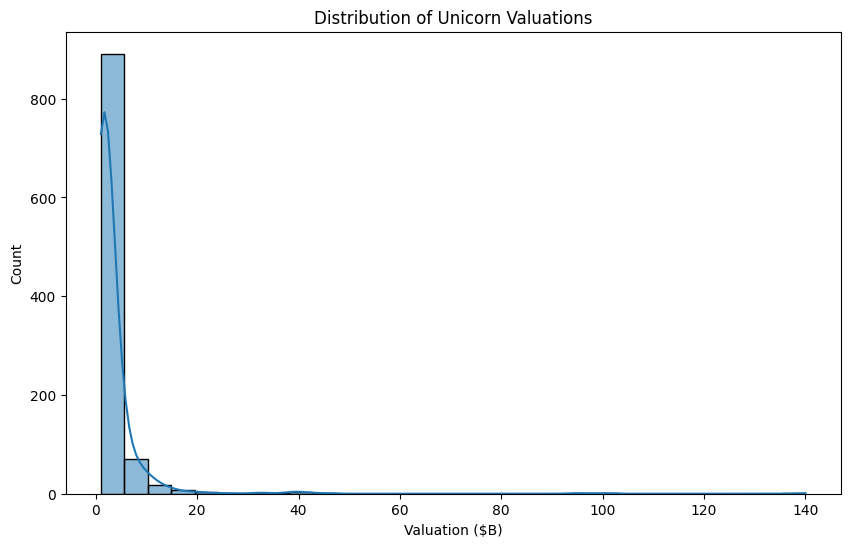

In [ ]:
# Distribution of valuations
plt.figure(figsize=(10, 6))
sns.histplot(df['Valuation ($B)'], bins=30, kde=True)
plt.title("Distribution of Unicorn Valuations")
plt.xlabel("Valuation ($B)")
plt.ylabel("Count")
plt.show()

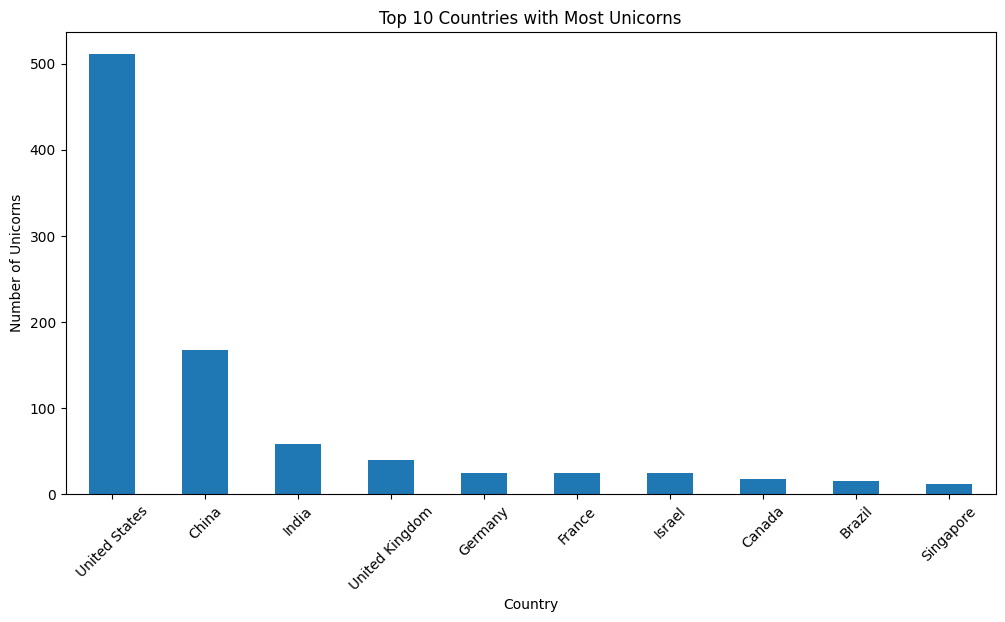

In [ ]:
# Number of unicorns per country
plt.figure(figsize=(12, 6))
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Countries with Most Unicorns")
plt.ylabel("Number of Unicorns")
plt.xticks(rotation=45)
plt.show()

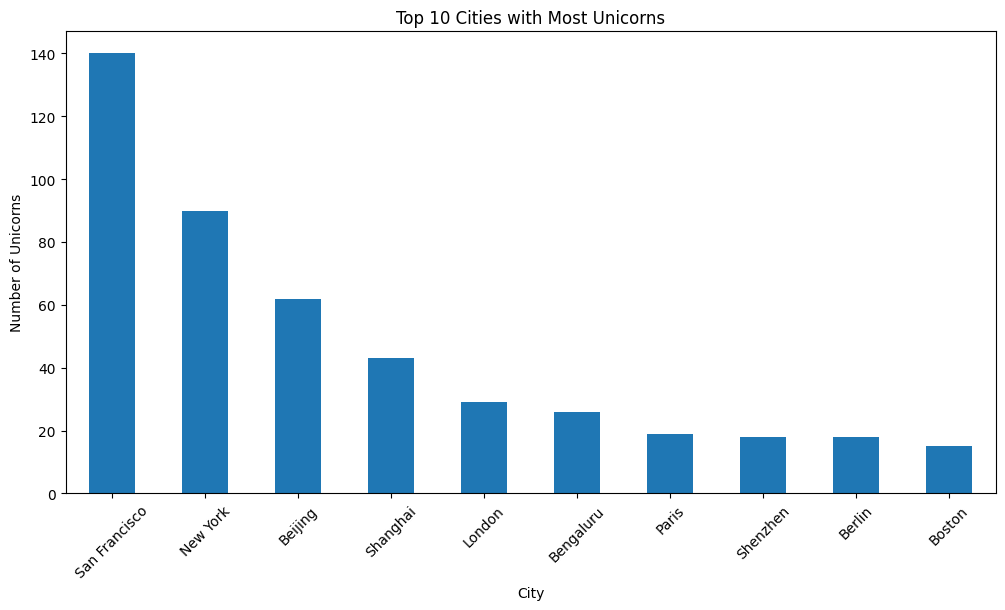

In [ ]:
# Number of unicorns per city
plt.figure(figsize=(12, 6))
df['City'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Cities with Most Unicorns")
plt.ylabel("Number of Unicorns")
plt.xticks(rotation=45)
plt.show()

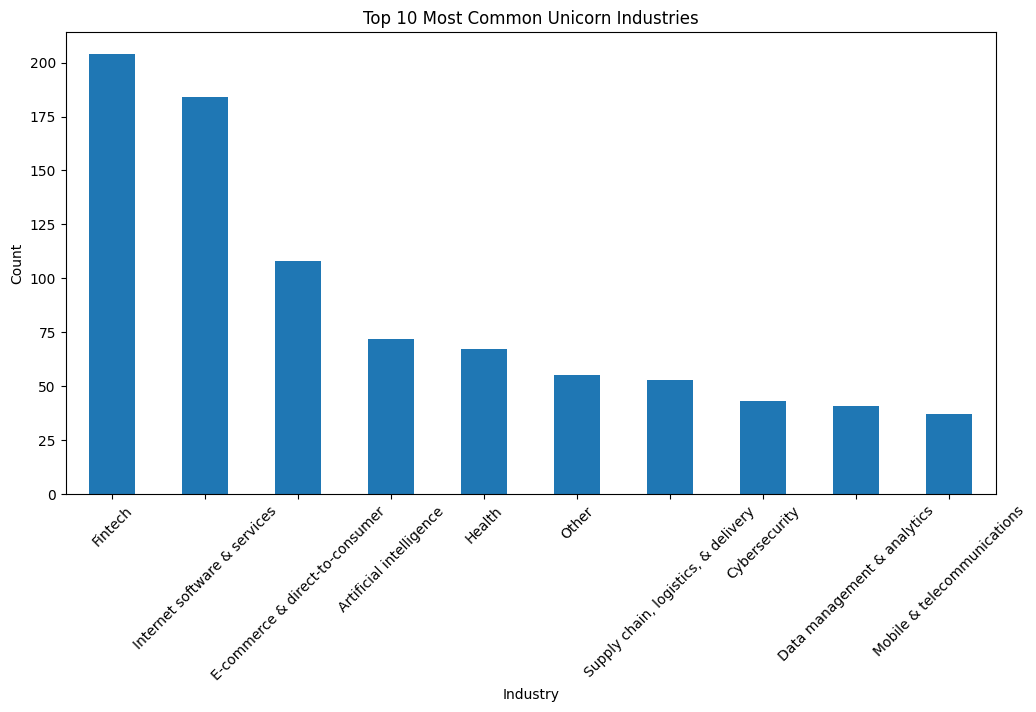

In [ ]:
# Most common industries
plt.figure(figsize=(12, 6))
df['Industry'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Most Common Unicorn Industries")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

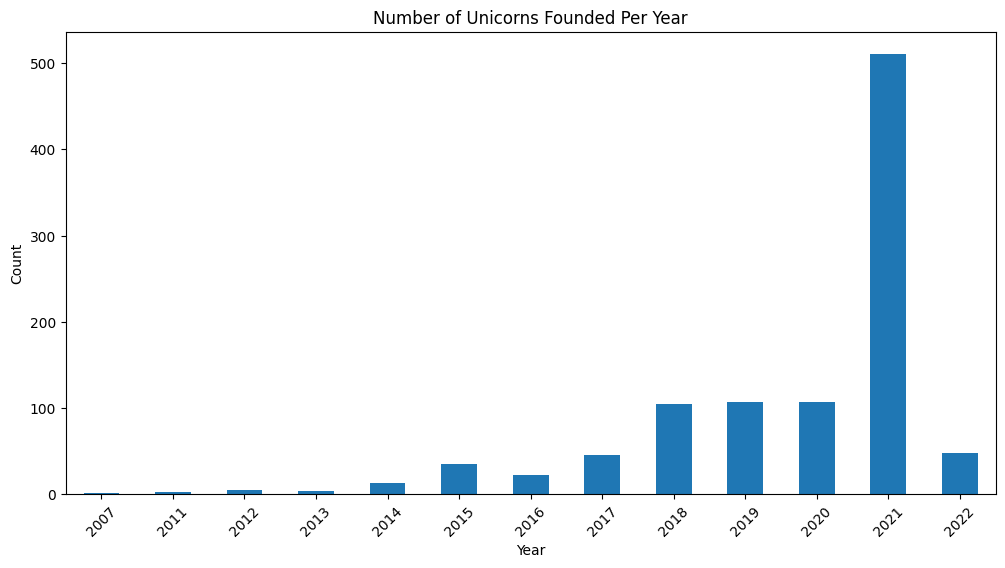

In [ ]:
# Number of unicorns over time
plt.figure(figsize=(12, 6))
df.groupby(df['Date Joined'].dt.year).size().plot(kind='bar')
plt.title("Number of Unicorns Founded Per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

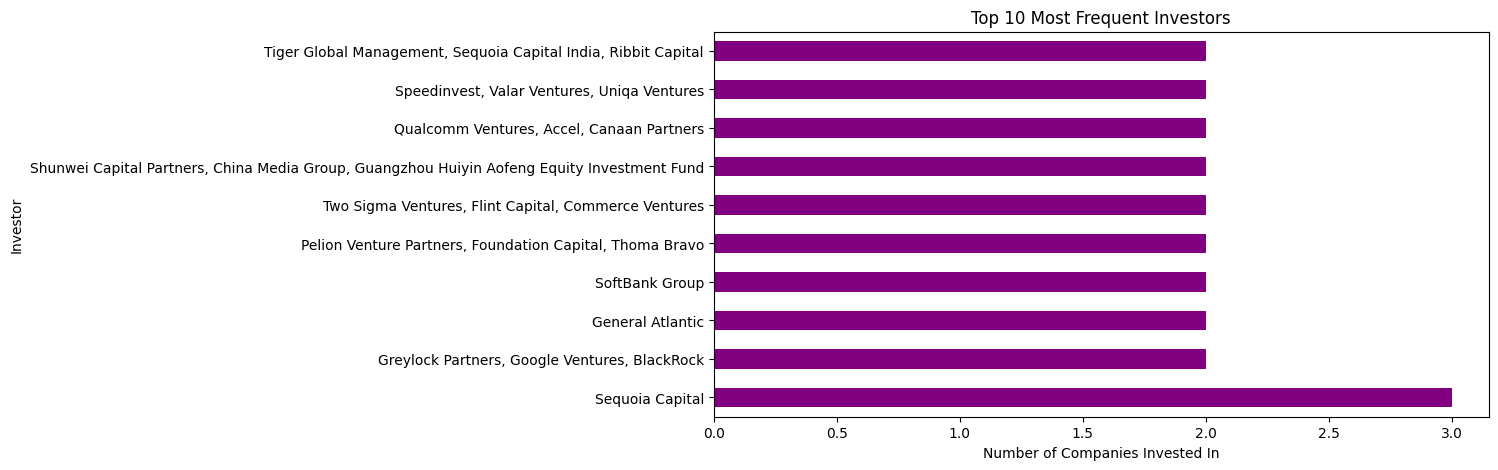

In [ ]:
# Top 10 most common investor names
plt.figure(figsize=(10,5))
df['Select Investors'].value_counts().head(10).plot(kind='barh', color='purple')
plt.xlabel('Number of Companies Invested In')
plt.ylabel('Investor')
plt.title('Top 10 Most Frequent Investors')
plt.show()

Top Investors:

Sequoia Capital is the most frequent investor, appearing multiple times.
Other top investors include Andreessen Horowitz, SoftBank, and Tiger Global.

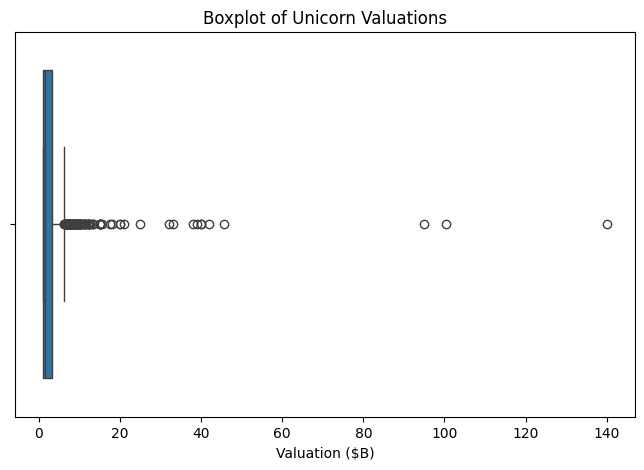

In [ ]:
# Outliers using boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Valuation ($B)'])
plt.title("Boxplot of Unicorn Valuations")
plt.show()

Outliers in Valuation:

Several high-valuation outliers exist (e.g., Bytedance $140B, SpaceX $100B).
Most unicorns are valued between $1B-$10B, but a few extreme values drive up the overall range.

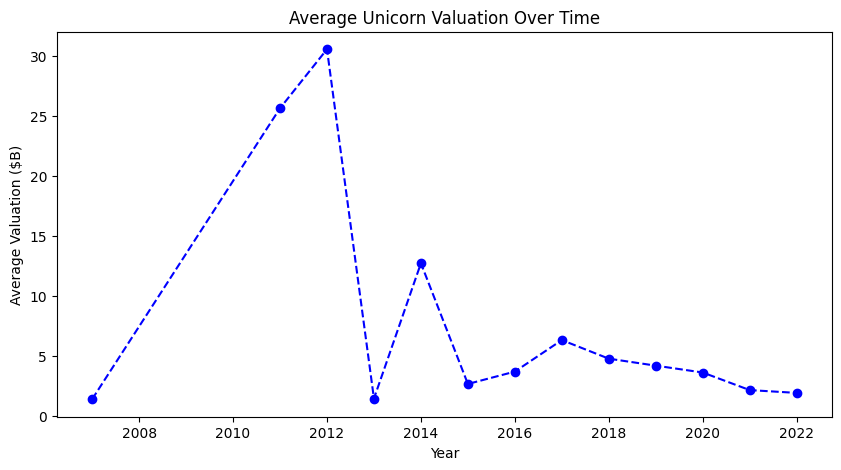

In [ ]:
# Average valuation trend over years

df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce')
df['Year Joined'] = df['Date Joined'].dt.year

plt.figure(figsize=(10,5))
df.groupby('Year Joined')['Valuation ($B)'].mean().plot(marker='o', color='blue', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.title('Average Unicorn Valuation Over Time')
plt.show()



The observed **decrease in average valuation over time** seems contradictory to the **overall market growth**. This discrepancy is likely because the dataset was collected in **2022** and has not been updated with recent data.



# 2. Visualizations

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


## Top 10 most valuable unicorns


In [ ]:

top_unicorns = df.sort_values("Valuation ($B)", ascending=False).head(10)

# Plot using Plotly bar chart
fig_top10 = px.bar(
    top_unicorns,
    x="Valuation ($B)",
    y="Company",
    orientation="h",
    color="Valuation ($B)",
    hover_data=["Country", "Industry", "City"],
    title="Top 10 Most Valuable Unicorn Companies",
    color_continuous_scale="Viridis",
    text="Valuation ($B)"
)

fig_top10.update_layout(
    title_font=dict(size=24),
    xaxis_title="Valuation in Billions ($)",
    yaxis_title="Company",
    yaxis=dict(categoryorder='total ascending')
)
fig_top10.update_traces(textposition="outside")
fig_top10.show()


🏆 Observations:
The #1 unicorn stands out clearly with a very high valuation, dwarfing others.

Several companies from Fintech, AI, and E-commerce dominate the list.

A mix of countries and industries shows how global and diversified the unicorn ecosystem is at the top.

##  World map of unicorns by country


In [ ]:

country_valuation = df.groupby("Country")["Valuation ($B)"].sum().reset_index()
country_valuation = country_valuation.sort_values(by="Valuation ($B)", ascending=False)

fig_map = px.scatter_geo(
    country_valuation,
    locations="Country",
    locationmode="country names",
    size="Valuation ($B)",
    hover_name="Country",
    projection="natural earth",
    title="Total Unicorn Valuation by Country",
    size_max=40,
    color="Valuation ($B)",
    color_continuous_scale="Viridis"
)

fig_map.update_layout(title_font=dict(size=24), geo=dict(showframe=False, showcoastlines=True))
fig_map.show()


🌍 Insights:
The United States dominates in total unicorn valuation.

China and India follow significantly behind but still ahead of other countries.

Countries like Germany, UK, and France have notable presence but at a smaller scale.

##  Cumulative growth of unicorns over time


In [ ]:

# Create a cumulative count of unicorns by date
df_sorted = df.sort_values("Date Joined")
df_sorted["Cumulative Count"] = df_sorted.groupby("Country")["Date Joined"].rank(method="first").astype(int)

# Create a global cumulative count
df_sorted['Global Count'] = range(1, len(df_sorted) + 1)

# Plot with Plotly
fig_growth = px.line(
    df_sorted.sort_values("Date Joined"),
    x="Date Joined",
    y="Global Count",
    title="Cumulative Growth of Unicorn Companies Over Time",
    labels={"Date Joined": "Date", "Global Count": "Cumulative Unicorns"},
)

fig_growth.update_traces(line=dict(color="royalblue", width=3))
fig_growth.update_layout(title_font=dict(size=24), xaxis_title="Date", yaxis_title="Number of Unicorns")
fig_growth.show()


📈 Insights:
Growth was relatively slow until around 2014–2015.

A steep acceleration starts post-2017, with sharp rises in 2020–2021, likely driven by tech expansion and pandemic-related digital demand.

The curve is now flattening slightly, suggesting saturation or economic shifts.



## Treemap of unicorns by Industry


In [ ]:

# Aggregate total valuation by Industry
industry_valuation = df.groupby("Industry")["Valuation ($B)"].sum().reset_index()
industry_valuation = industry_valuation.sort_values(by="Valuation ($B)", ascending=False)

# Create treemap using Plotly
fig_treemap = px.treemap(
    industry_valuation,
    path=["Industry"],
    values="Valuation ($B)",
    title="Unicorn Valuation Distribution by Industry",
    color="Valuation ($B)",
    color_continuous_scale="Viridis"
)

fig_treemap.update_layout(title_font=dict(size=24))
fig_treemap.show()


🧱 Insights:
Fintech leads all sectors by a wide margin, followed by Internet software & services.

E-commerce, AI, and healthcare also dominate.

Industries like Cybersecurity and Logistics have smaller but still notable presence.



## Top 20 Most Active Unicorn Investors

In [ ]:
# Split the investors column into individual investors and explode
df_investors = df.copy()
df_investors["Select Investors"] = df_investors["Select Investors"].str.split(", ")
df_exploded = df_investors.explode("Select Investors")

# Count the number of unicorns each investor has backed
investor_counts = df_exploded["Select Investors"].value_counts().reset_index()
investor_counts.columns = ["Investor", "Unicorn Count"]

# Take top 20 investors
top_investors = investor_counts.head(20)

# Plot using Plotly
import plotly.express as px

fig_investors = px.bar(
    top_investors.sort_values("Unicorn Count", ascending=True),
    x="Unicorn Count",
    y="Investor",
    orientation="h",
    title="Top 20 Most Active Unicorn Investors",
    text="Unicorn Count",
    color="Unicorn Count",
    color_continuous_scale="Viridis"
)

fig_investors.update_layout(title_font=dict(size=24), xaxis_title="Number of Unicorns Backed", yaxis_title="Investor")
fig_investors.update_traces(textposition="outside")
fig_investors.show()


 Insights:
Tiger Global Management, Andreessen Horowitz, and Sequoia Capital top the list — backing dozens of unicorns each.

Other big names like Accel, SoftBank, and General Catalyst are also major players.

The chart reflects venture capital influence concentrated among a few key firms.



## Animated timeline of unicorns joining over time by valuation and industry


In [ ]:

# Prepare a subset for better performance (optional: top industries or recent years)
animated_df = df.copy()

# Plotly animated scatter plot
fig_animated = px.scatter(
    animated_df,
    x="Valuation ($B)",
    y="Industry",
    animation_frame=animated_df["Date Joined"].dt.year.astype(str),
    size="Valuation ($B)",
    color="Industry",
    hover_name="Company",
    title="Unicorns Over Time: Valuation Growth by Industry",
    log_x=True,
    size_max=45,
    height=700
)

fig_animated.update_layout(title_font=dict(size=24))
fig_animated.show()


📊 Insights:
Fintech and Internet Software & Services dominate growth in recent years.

2021 shows a major spike across almost all industries, possibly due to pandemic-driven tech acceleration.

E-commerce and AI grew steadily but have a smaller yearly footprint.